# Exploratory analysis

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("C:\\Users\\Julian\\Desktop\\DATA\\Proyectos DS\\BreastCancer")


In [2]:
df = pd.read_csv("data.csv")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
print(df.size)
df.shape


18777


(569, 33)

The dataset consists of 569 rows and 33 columns. 
Each row represent a specific patient, with an specific id number. 

## Columns Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In this dataset, the features are derived from a digitized image of a fine needle aspirate (FNA) of a breast mass, encompassing detailed descriptions of the characteristics exhibited by the cell nuclei present in the image. For each cell nucleus, a set of ten real-valued features are computed:

        Radius (mean of distances from center to points on the perimeter)

        Texture (standard deviation of gray-scale values)

        Perimeter

        Area

        Smoothness (local variation in radius lengths)

        Compactness (perimeter^2 / area - 1.0)

        Concavity (severity of concave portions of the contour)

        Concave points (number of concave portions of the contour)

        Symmetry

        Fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image,resulting in 30 features.

# Data visualization

### Density plot 


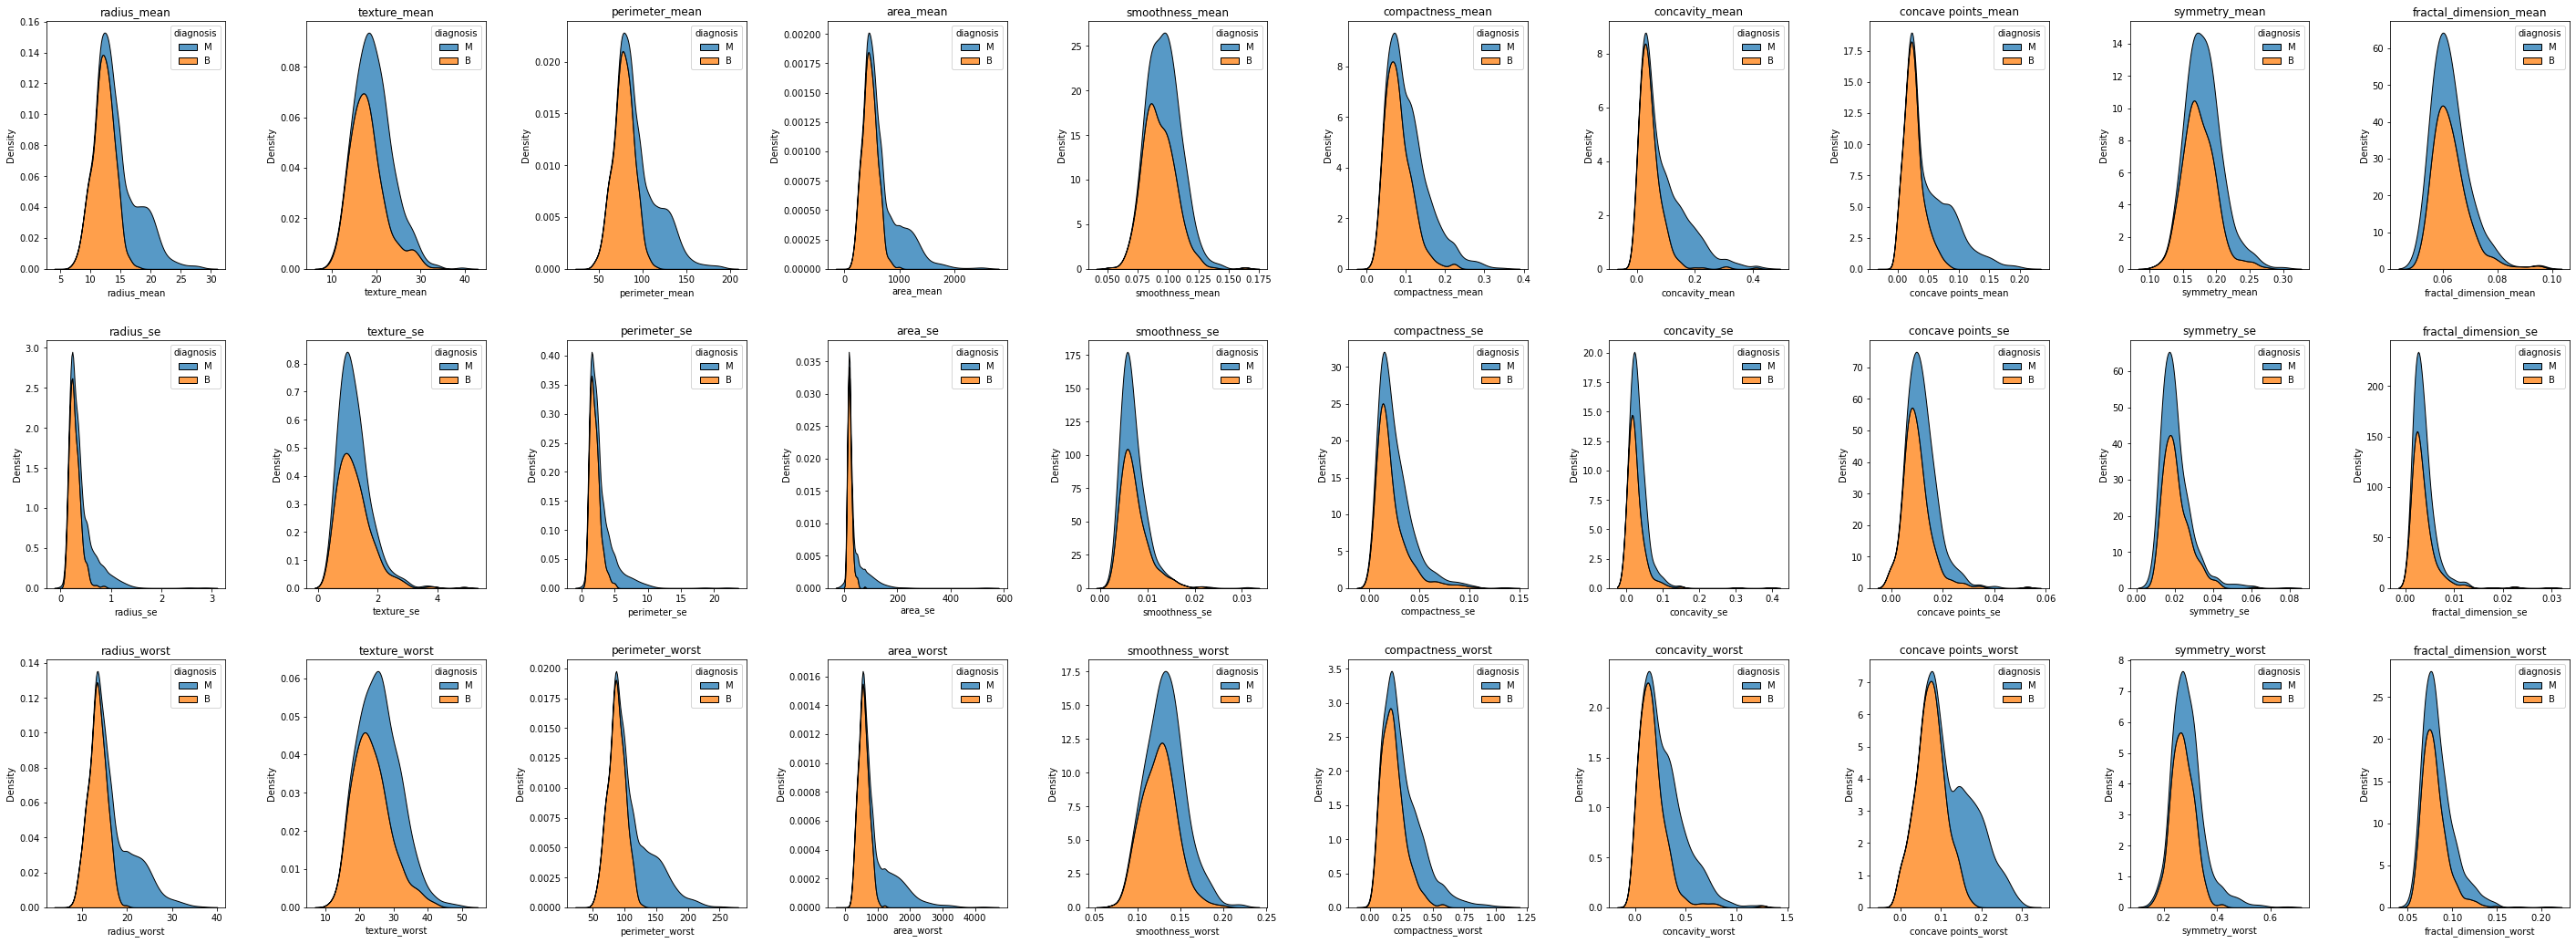

In [16]:
plt.figure(1 , figsize = (40 , 15))

n = 0 
for x in ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',]:
    n += 1
    plt.subplot(3 , 10, n)
    plt.subplots_adjust(hspace = 3 , wspace =3)
    plt.tight_layout(pad=3)
    sns.kdeplot(data=df, x=df[x], hue=df["diagnosis"], multiple="stack")
    plt.title('{}'.format(x))

In the density plots, the peaks show where values are concentrated. 
There are some features as texture, smoothness and symmetry that seem to have a normal distribution. 
As we can observe, in this dataset malignous cancers tend to have higher values of the different features.

## Box-Plot

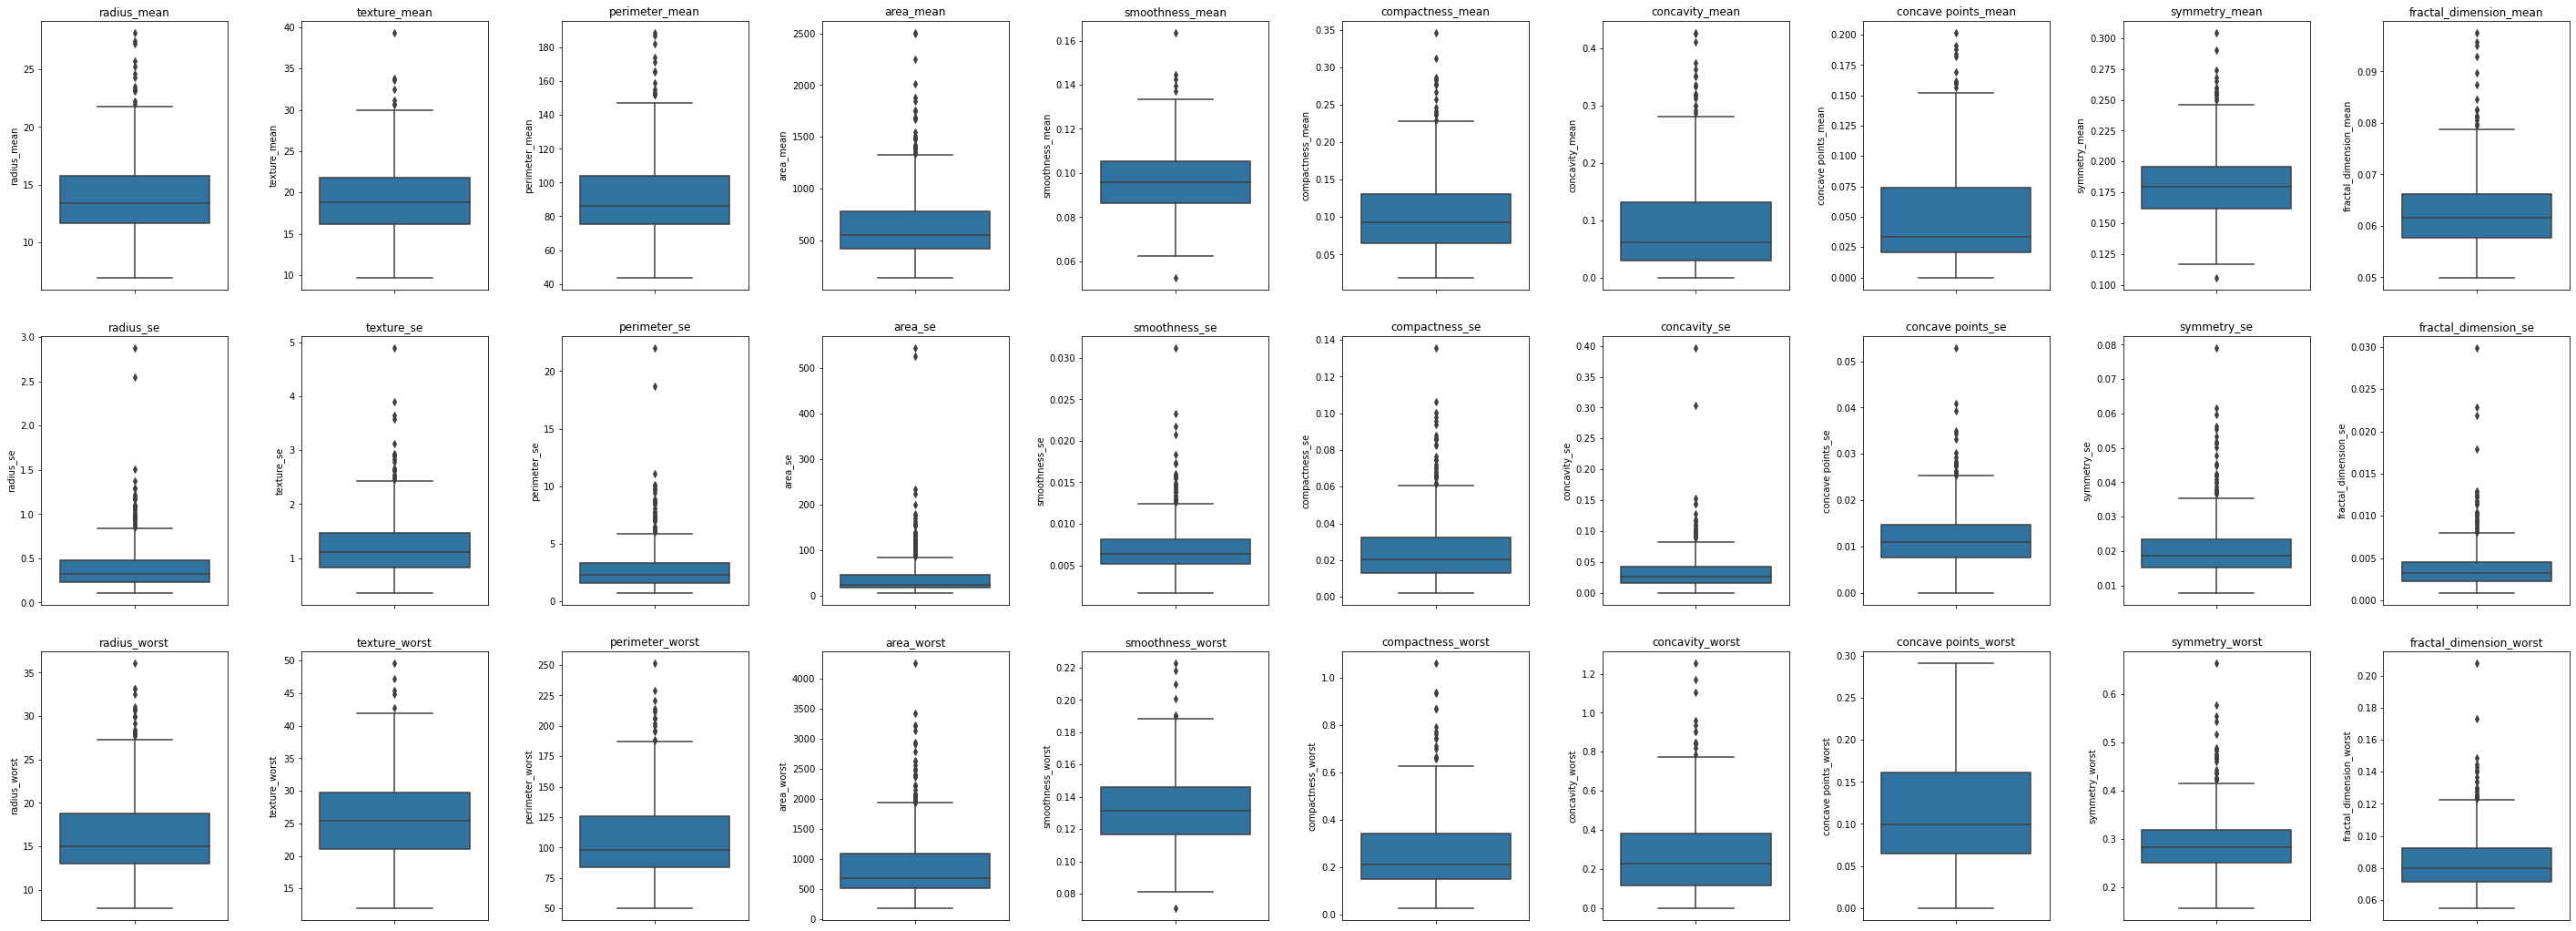

In [20]:
plt.figure(1 , figsize = (40 , 15))

n = 0 
for x in ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',]:
    n += 1
    plt.subplot(3 , 10, n)
    plt.subplots_adjust(hspace = 3 , wspace =3)
    plt.tight_layout(pad=3)
    ax = sns.boxplot(data=df, y=df[x], hue=df["diagnosis"])
    #ax = sns.swarmplot(x="diagnosis", y=x, data=df , hue="diagnosis", alpha=0.5)
    plt.title('{}'.format(x))

In [ ]:
plt.figure(1 , figsize = (40 , 15))

n = 0 
for x in ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst',]:
    n += 1
    plt.subplot(3 , 10, n)
    plt.subplots_adjust(hspace = 3 , wspace =3)
    plt.tight_layout(pad=3)
    ax = sns.boxplot(x="diagnosis", y=x, data=df)
    ax = sns.swarmplot(x="diagnosis", y=x, data=df, palette = ["gray"], hue="diagnosis", alpha=0.5)
    plt.title('{}'.format(x))